# Time series creation, entropy + autocorrelation computation for a single corpus

## Text extraction from PDF files

In [1]:
import PyPDF2, nltk, textract
from nltk.tokenize import word_tokenize
import re
import spacy
import spacy.lang.pl
import pandas as pd
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
import io
import base64

### Load all files from a directory

In [2]:
data = pd.read_excel("C:/Users/marta/OneDrive/Desktop/Dane/Autobiografie/Literature/corpus_for_cleanup.xlsx")

data.dropna(inplace=True)

text = data.values.flatten()

### Text pre-processing of the text for frequency analysis (lemmatized version)

In [3]:
# Cleaning the text
punctuations = ['(',')',';',':','[',']',',','...', "…", '.', "„", "”", "!", "-", "?"]

# Lemmatization
nlp = spacy.load("pl_core_news_sm")

cleaned_text = []

for sentence in text:
    cleaned_words_in_sentence = []
    for word in word_tokenize(sentence, language='polish'):
        # Lowercasing, removing punctuations, leaving letters only, and removing stopwords
        cleaned_word = word.lower()
        if cleaned_word not in punctuations and cleaned_word.isalpha():
            cleaned_words_in_sentence.append(cleaned_word)

    lemmatized_words = [token.lemma_ for token in nlp(" ".join(cleaned_words_in_sentence))]        
    cleaned_text.append(lemmatized_words)

print(cleaned_text)

[['otwierać', 'oko'], ['wszystko', 'dookoła', 'jakby', 'wirować'], ['kręcić', 'ja', 'się', 'w', 'głowa'], ['być', 'jeszcze', 'noc'], ['próbować', 'zorientować', 'się', 'gdzie', 'być', 'ale', 'mój', 'głowa', 'być', 'ociężać'], ['nie', 'móc', 'zebrać', 'myśl'], ['rozglądać', 'się', 'widzieć', 'biały', 'łóżko'], ['oko', 'zachodzić', 'ja', 'łza'], ['nie', 'to', 'niemożliwy'], ['to', 'nie', 'móc', 'być', 'prawda'], ['przecież'], ['ja'], ['nie'], ['zaciskać', 'powieka'], ['zaczynać', 'płakać'], ['boży', 'być', 'w', 'szpital'], ['nie', 'nie', 'nie'], ['błagać', 'nie'], ['dlaczego'], ['dlaczego', 'ja', 'się', 'nie', 'udać'], ['po', 'co', 'po', 'co', 'ja', 'uratować'], ['ja', 'nie', 'chcieć'], ['nie', 'móc'], ['nie', 'dać', 'rada', 'nie', 'zniosę', 'to', 'długo'], ['do', 'sala', 'wchodzić', 'pielęgniarka'], ['mierz', 'ja', 'zimny', 'wzrok', 'i', 'szarpać', 'ręka', 'żeby', 'wbić', 'się', 'igłą', 'i', 'pobrać', 'krew'], ['nie', 'móc', 'powstrzymać', 'szloch'], ['to', 'jakiś', 'koszmar'], ['zły', 

In [4]:
from collections import Counter

# Flatten the list of lists into a single list
all_words = [word for sublist in cleaned_text for word in sublist]

# Calculate word frequency using Counter
word_frequency = Counter(all_words)

#print(word_frequency)


# Calculate the maximum frequency
max_frequency = max(word_frequency.values())

# Normalize the word frequencies to a scale from 0 to 1
normalized_scores = {word: freq / max_frequency for word, freq in word_frequency.items()}

print(normalized_scores)

{'otwierać': 0.006153846153846154, 'oko': 0.04, 'wszystko': 0.07076923076923076, 'dookoła': 0.006153846153846154, 'jakby': 0.015384615384615385, 'wirować': 0.003076923076923077, 'kręcić': 0.006153846153846154, 'ja': 0.8430769230769231, 'się': 0.9969230769230769, 'w': 0.7938461538461539, 'głowa': 0.052307692307692305, 'być': 0.5138461538461538, 'jeszcze': 0.04, 'noc': 0.024615384615384615, 'próbować': 0.021538461538461538, 'zorientować': 0.003076923076923077, 'gdzie': 0.027692307692307693, 'ale': 0.16, 'mój': 0.16307692307692306, 'ociężać': 0.003076923076923077, 'nie': 1.0, 'móc': 0.19692307692307692, 'zebrać': 0.003076923076923077, 'myśl': 0.024615384615384615, 'rozglądać': 0.012307692307692308, 'widzieć': 0.03076923076923077, 'biały': 0.003076923076923077, 'łóżko': 0.052307692307692305, 'zachodzić': 0.003076923076923077, 'łza': 0.021538461538461538, 'to': 0.6861538461538461, 'niemożliwy': 0.003076923076923077, 'prawda': 0.006153846153846154, 'przecież': 0.021538461538461538, 'zaciskać

In [5]:
sentence_word_frequencies = []

for sentence in cleaned_text:
    sentence_frequency = 0
    for word in sentence:
        # Check if the word exists in the normalized_scores dictionary
        if word in normalized_scores:
            sentence_frequency += normalized_scores[word]  # Accumulate the word frequency for the sentence

    # Calculate the average popularity per word in the sentence
    if len(sentence) > 0:
        average_popularity = sentence_frequency / len(sentence)
    else:
        average_popularity = 0  # Handle division by zero

    sentence_word_frequencies.append(average_popularity)

print(sentence_word_frequencies)

[0.023076923076923078, 0.023846153846153843, 0.5384615384615385, 0.19282051282051282, 0.24553846153846154, 0.30615384615384617, 0.21907692307692309, 0.22692307692307692, 0.563076923076923, 0.48061538461538456, 0.021538461538461538, 0.8430769230769231, 1.0, 0.01076923076923077, 0.026153846153846153, 0.34076923076923077, 1.0, 0.5030769230769231, 0.015384615384615385, 0.5772307692307692, 0.2953846153846154, 0.642051282051282, 0.5984615384615385, 0.39208791208791205, 0.11307692307692307, 0.2454945054945055, 0.3038461538461538, 0.2523076923076923, 0.015384615384615385, 0.25196581196581197, 0.2276923076923077, 0.15472527472527473, 0.00717948717948718, 0.006153846153846154, 0.1955029585798816, 0.06065934065934066, 0.005128205128205128, 0.24410256410256412, 0.09784615384615385, 0.2615384615384615, 0.2282051282051282, 0.1716923076923077, 0.3071794871794872, 0.04923076923076923, 0.3588461538461538, 0.046153846153846156, 0.21307692307692305, 0.33743589743589736, 0.036923076923076927, 0.0061538461

### Text pre-processing of the text for word-length analysis (NON-lemmatized version)

In [6]:
# Cleaning the text
punctuations = ['(',')',';',':','[',']',',','...', "…", '.', "„", "”", "!", "-", "?"]

cleaned_text = []

for sentence in text:
    cleaned_words_in_sentence = []
    for word in word_tokenize(sentence, language='polish'):
        # Lowercasing, removing punctuations, leaving letters only, and removing stopwords
        cleaned_word = word.lower()
        if cleaned_word not in punctuations and cleaned_word.isalpha():
            cleaned_words_in_sentence.append(cleaned_word)
       
    cleaned_text.append(cleaned_words_in_sentence)

print(cleaned_text)

[['otwieram', 'oczy'], ['wszystko', 'dookoła', 'jakby', 'wirowało'], ['kręci', 'mi', 'się', 'w', 'głowie'], ['jest', 'jeszcze', 'noc'], ['próbuję', 'zorientować', 'się', 'gdzie', 'jestem', 'ale', 'moja', 'głowa', 'jest', 'ociężała'], ['nie', 'mogę', 'zebrać', 'myśli'], ['rozglądam', 'się', 'widzę', 'białe', 'łóżka'], ['oczy', 'zachodzą', 'mi', 'łzami'], ['nie', 'to', 'niemożliwe'], ['to', 'nie', 'może', 'być', 'prawda'], ['przecież'], ['ja'], ['nie'], ['zaciskam', 'powieki'], ['zaczynam', 'płakać'], ['boże', 'jestem', 'w', 'szpitalu'], ['nie', 'nie', 'nie'], ['błagam', 'nie'], ['dlaczego'], ['dlaczego', 'mi', 'się', 'nie', 'udało'], ['po', 'co', 'po', 'co', 'mnie', 'uratowano'], ['ja', 'nie', 'chcę'], ['nie', 'mogę'], ['nie', 'dam', 'rady', 'nie', 'zniosę', 'tego', 'dłużej'], ['do', 'sali', 'wchodzi', 'pielęgniarka'], ['mierzy', 'mnie', 'zimnym', 'wzrokiem', 'i', 'szarpie', 'rękę', 'żeby', 'wbić', 'się', 'igłą', 'i', 'pobrać', 'krew'], ['nie', 'mogę', 'powstrzymać', 'szlochu'], ['to', 

In [7]:
sentence_lengths = []

for sentence in cleaned_text:
    # Calculate the total word length for the sentence
    total_word_length = sum(len(word) for word in sentence)
    
    # Calculate the number of words in the sentence
    num_words = len(sentence)
    
    # Calculate the average word length per sentence
    if num_words != 0:  # Avoid division by zero
        average_word_length = total_word_length / num_words
    else:
        average_word_length = 0
    
    sentence_lengths.append(average_word_length)


print(sentence_lengths)

[6.0, 7.0, 3.4, 4.666666666666667, 5.6, 4.5, 5.4, 4.75, 5.0, 3.6, 8.0, 2.0, 3.0, 7.5, 7.0, 4.75, 3.0, 4.5, 8.0, 4.2, 3.5, 3.0, 3.5, 4.142857142857143, 6.25, 4.428571428571429, 6.25, 4.666666666666667, 3.0, 5.0, 6.2, 6.285714285714286, 7.0, 8.0, 5.0, 5.428571428571429, 7.666666666666667, 5.333333333333333, 5.6, 4.5, 5.416666666666667, 6.4, 4.166666666666667, 5.5, 4.375, 5.0, 5.5, 6.333333333333333, 4.0, 6.0, 5.0, 5.444444444444445, 6.1, 6.0, 8.0, 6.666666666666667, 5.8, 5.4, 3.5, 5.428571428571429, 5.0, 5.090909090909091, 4.5, 5.333333333333333, 4.428571428571429, 3.6, 5.6, 4.333333333333333, 4.208333333333333, 5.5, 5.25, 5.285714285714286, 4.0, 4.0, 3.923076923076923, 4.461538461538462, 6.888888888888889, 7.666666666666667, 5.090909090909091, 5.5, 4.55, 4.25, 5.375, 7.0, 4.0, 4.0, 6.0, 4.6, 4.285714285714286, 5.142857142857143, 4.4, 5.333333333333333, 4.043478260869565, 7.142857142857143, 6.190476190476191, 3.3333333333333335, 5.5, 2.5, 4.5, 4.5, 5.25, 5.285714285714286, 6.5, 3.75, 4.3

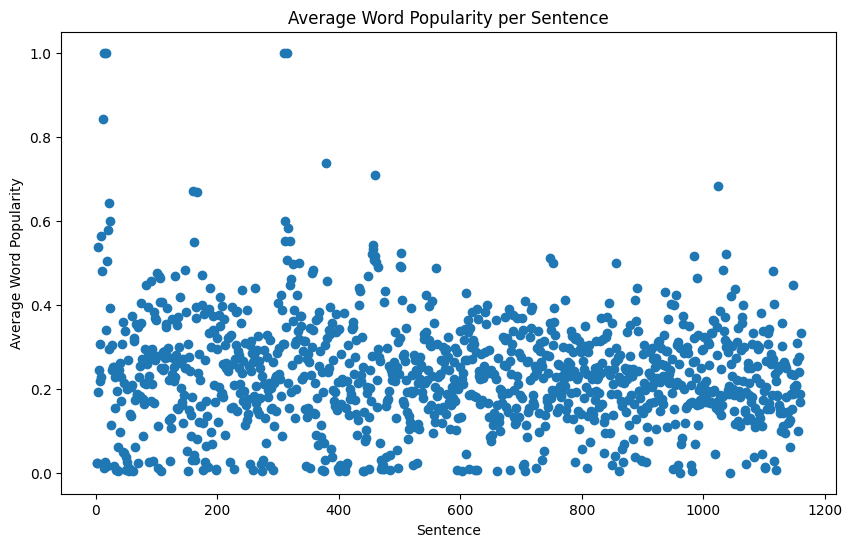

In [8]:
import matplotlib.pyplot as plt

# Create x-axis values (indices of sentences)
x = range(1, len(sentence_word_frequencies) + 1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, sentence_word_frequencies)
plt.title('Average Word Popularity per Sentence')
plt.xlabel('Sentence')
plt.ylabel('Average Word Popularity')
#plt.xticks(x)  # Set x-axis ticks to match sentence indices
plt.show()

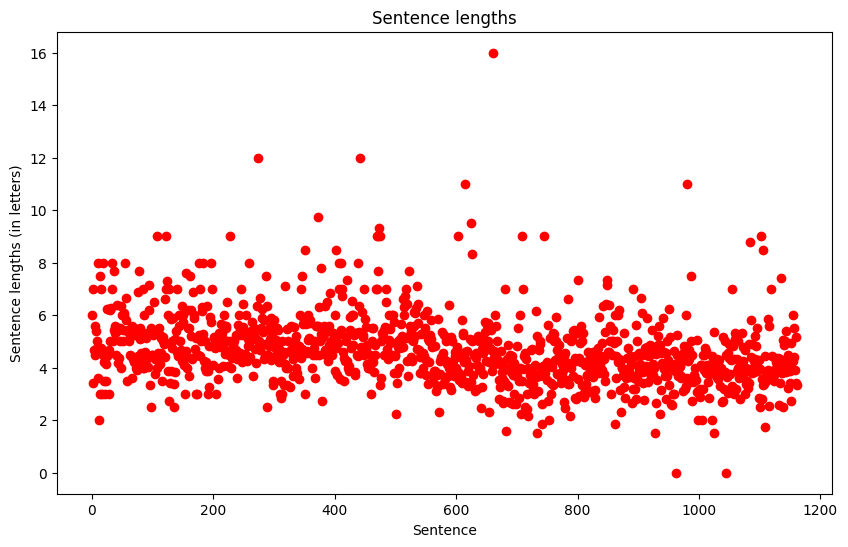

In [9]:
import matplotlib.pyplot as plt

# Create x-axis values (indices of sentences)
x = range(1, len(sentence_word_frequencies) + 1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, sentence_lengths, color='red')
plt.title('Sentence lengths')
plt.xlabel('Sentence')
plt.ylabel('Sentence lengths (in letters)')
#plt.xticks(x)  # Set x-axis ticks to match sentence indices
plt.show()

In [10]:
new_df = pd.DataFrame({'sentence': data.values.flatten(), 'length': sentence_lengths, 'frequency': sentence_word_frequencies})

print(new_df)

#### Slow subjective time === short; high frequency

                                               sentence    length  frequency
0                                        Otwieram oczy.  6.000000   0.023077
1                      Wszystko dookoła jakby wirowało.  7.000000   0.023846
2                                Kręci mi się w głowie.  3.400000   0.538462
3                                     Jest jeszcze noc.  4.666667   0.192821
4     Próbuję zorientować się, gdzie jestem, ale moj...  5.600000   0.245538
...                                                 ...       ...        ...
1156  Od początkuwiedziałam prz ecież, że nie mogę u...  5.500000   0.239692
1157  T owszystk o musiało się wy d arzyć, żeb y dop...  3.894737   0.276437
1158  Bo niezależnie od tego dokąd uciekniesz – za w...  5.181818   0.167832
1159  E p i l o gDo trz ech r azy sztukaZ a trz ecim...  3.417910   0.186912
1160  Nie ma w t ym nic wst y dliwego ,a prosz enie ...  3.333333   0.332137

[1161 rows x 3 columns]


### **Equations for conversion from partial eta to Hedges' g**

https://tobiasztrawinski.com/post/effect-size-transormation/

In [11]:
import scipy.optimize as statss
import scipy.stats as stats
import numpy as np

# For a two-way ANOVA
# Suitable for comparison of two conditions, like short words vs long words, or freqent vs infrequent
# Indices 1 and 2 refer to within group conditions (Asian vs Caucasian perofrmance on a cognitive test)
# ANOVA is often given as 2x3 ANOVA for example. "2" implies it's two-way; "3" is levels of comparison
# 2 - (Word Frequency x Exposure Duration)
# 3 - (Participant; Word Frequency; and Exposure Duration)

def cohens_d(df1, df2, n1, F1):
    eta1 = (F1 * df1) / ((F1 * df1) + df2)
    d1 = np.sqrt((n1 - 1) / n1 * eta1 / (1 - eta1))

    return d1


# Confidence Intervals for Fn (F1, F2, F3, etc.)
def get_ncp_t(F, n, df2, conf_level=0.95):
    t = np.sqrt(F)
    alpha = 1 - conf_level
    probs = [alpha / 2, 1 - alpha / 2]

    def optimize_func(x):
        p = stats.nct.cdf(t, df2, loc=0, scale=1, nc=x)
        return abs(max(p) - probs[1]) + abs(min(p) - probs[0])

    result = statss.minimize(optimize_func, x0=[1.1 * t, 1.1 * t], method='Nelder-Mead', tol=1e-9)
    t_ncp = np.sort(result.x)
    hn = 1 / (n - 1)
    CI_low = t_ncp[0] * np.sqrt(hn)
    CI_high = t_ncp[1] * np.sqrt(hn)
    print(f'Low CI for F={F} is {CI_low} at {conf_level} \nHigh CI for F={F} is {CI_high} at {conf_level}')


# Hedges' g for Fn (F1, F2, F3, etc.)
def hedges_g(d, n):
    sssbc = 1 - (3 / (4 * n - 9))
    return d*sssbc


# Rosenthal and Rosnow, 1991, seems correct
def hedges_g_from_t(t_value, df, n):
    d = t_value / np.sqrt(df)
    correction_factor = 1 - (3 / (4 * n - 9))
    g = d * correction_factor
    return g


### **Hedges' g for each study (word length)**

In [12]:
# Warm and McCray, 1969
gl1 = hedges_g(cohens_d(df1=1, df2=47, n1=48, F1=9.04), n=48)
print(f'Hedges\' g for Warm and McCray, 1969: {round(gl1, 3)}') 

# Devane, 1974
gl2 = hedges_g(cohens_d(df1=1, df2=46, n1=48, F1=3.10), n=48)
print(f'Hedges\' g for Devane, 1974: {round(gl2, 3)}') 

# Mean g
print(f'\nMean effect size for word length: {round(np.mean([gl1, gl2]), 3)}')

Hedges' g for Warm and McCray, 1969: 0.427
Hedges' g for Devane, 1974: 0.253

Mean effect size for word length: 0.34


### **Hedges' g for each study (word frequency)**

In [13]:
# Warm and McCray, 1969
gf1 = hedges_g(cohens_d(df1=1, df2=47, n1=48, F1=12.1), n=48)
print(f'Hedges\' g for Warm and McCray, 1969: {round(gf1, 3)}')

# Chastain and Ferraro, 1997
gf2 = hedges_g(cohens_d(df1=1, df2=9, n1=10, F1=7.84), n=10)  
print(f'Hedges\' g for Chastain and Ferraro, 1997: {round(gf2, 3)}')

# Hochhaus, Swanson and Carter, 1991
gf3 = hedges_g(cohens_d(df1=1, df2=15, n1=16, F1=7.69), n=16)
print(f'Hedges\' g for Hochhaus, Swanson and Carter, 1991: {round(gf3, 3)}')

# Warm, Greenberg and Dube, 1964
gf4 = hedges_g_from_t(t_value=4.54, df=44, n=45)
print(f'Hedges\' g for Warm, Greenberg and Dube, 1964: {round(gf4, 3)}')

# Devane, 1974
gf5 = hedges_g(cohens_d(df1=1, df2=46, n1=48, F1=12.46), n=48)
print(f'Hedges\' g for Devane, 1974: {round(gf5, 3)}')

# Mean g
print(f'\nMean effect size for word frequency: {round(np.mean([gf1, gf2, gf3, gf4, gf5]), 3)}')

Hedges' g for Warm and McCray, 1969: 0.494
Hedges' g for Chastain and Ferraro, 1997: 0.8
Hedges' g for Hochhaus, Swanson and Carter, 1991: 0.655
Hedges' g for Warm, Greenberg and Dube, 1964: 0.672
Hedges' g for Devane, 1974: 0.507

Mean effect size for word frequency: 0.626


In [14]:
# 98% quantiles for length and frequency
high_length_quantile = new_df['length'].quantile(0.98)
low_length_quantile = new_df['length'].quantile(0.02)
high_frequency_quantile = new_df['frequency'].quantile(0.98)
low_frequency_quantile = new_df['frequency'].quantile(0.02)

# Filter DataFrame to get top and bottom 5% for length and frequency
top_length = new_df[new_df['length'] >= high_length_quantile].sort_values(by='length', ascending=False)
bottom_length = new_df[new_df['length'] <= low_length_quantile].sort_values(by='length', ascending=True)
top_frequency = new_df[new_df['frequency'] >= high_frequency_quantile].sort_values(by='frequency', ascending=False)
bottom_frequency = new_df[new_df['frequency'] <= low_frequency_quantile].sort_values(by='frequency', ascending=True)

In [15]:
frequency_list = []

for word in data['sentence']:
    # Check if the word is present in the 'sentence' column of top_frequency
    if word in top_frequency['sentence'].values:
        value = -0.267  # frequent words = overestmation
    elif word in bottom_frequency['sentence'].values:
        value = 0.267  # infrequent words = underestimation
    else:
        value = 0
    frequency_list.append(value)

length_list = []

for word in data['sentence']:
    # Check if the word is present in the 'sentence' column of top_frequency
    if word in top_length['sentence'].values:
        value = 0.127 # longer words processed faster
    elif word in bottom_length['sentence'].values:
        value = -0.127   # shorter words = overestimation
    else:
        value = 0
    length_list.append(value)

result = [x + y for x, y in zip(length_list, frequency_list)]


In [16]:
def process_data():
    # Read the data
    df_valence = pd.read_csv('C:/Users/marta/OneDrive/Desktop/Dane/Autobiografie/Literature/output_file.csv')
    df_arousal = pd.read_excel('C:/Users/marta/OneDrive/Desktop/Dane/Autobiografie/Literature/arousal_output_file.xlsx')

    # Merge the dataframes
    df = pd.merge(df_valence, df_arousal, on='sentence', how='inner')

    # Drop unnecessary columns and rows with missing values
    df.drop(columns='valence_label', inplace=True)
    df.dropna(axis=0, how='any', inplace=True)

    # Initialize combined column
    df['combined'] = 0

    # Update combined column based on valence and arousal values
    for idx, row in df.iterrows():
        valence_step = row['valence']
        arousal_step = row['numerical_arousal']

        if valence_step == 2 and arousal_step == 2:
            combined = -0.099
        elif valence_step == 0 and arousal_step == 0:
            combined = -0.202
        elif valence_step == 0 and arousal_step == 2:
            combined = -0.202
        elif valence_step == 2 and arousal_step == 0:
            combined = 0.022
        else:
            combined = 0

        df.at[idx, 'combined'] = float(combined)

    return df['combined']

C:\Users\marta\AppData\Local\Temp\ipykernel_29132\3423582228.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.202' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, 'combined'] = float(combined)


0.972576409109405


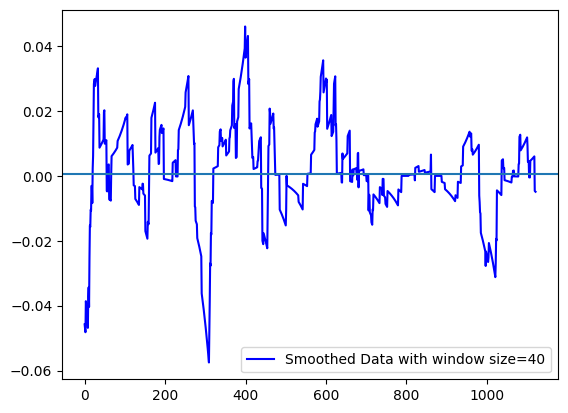

In [34]:
from scipy.ndimage import gaussian_filter1d
from statsmodels.tsa.arima.model import ARIMA

old_data = process_data()

final_result = [x + y for x, y in zip(old_data, result)]

def exponential_smoothing(x, window_size):
    alpha = 2 / (window_size + 1)
    weights = np.exp(np.linspace(-1, 0, window_size))
    weights /= weights.sum()
    smoothed_x = np.convolve(x, weights, mode='valid')
    return smoothed_x

def calculate_autocorrelation(data, lag=1):
        # Ensure data is a 1D array
        data = np.array(data).flatten()
        
        # Calculate autocorrelation
        acorr = np.corrcoef(np.array([data[:-lag], data[lag:]]))
        return acorr[0, 1]

window_size = 40
smoothed_x = exponential_smoothing(final_result, window_size)

# Pad the beginning of smoothed_x with zeros to match the length of x
smoothed_x = np.concatenate((np.zeros(window_size - 1), smoothed_x))

print(calculate_autocorrelation(smoothed_x))

# Further smoothing with a Gaussian filter
sigma = 2  # Adjust as needed
smoothed_x1 = gaussian_filter1d(smoothed_x, sigma=sigma)

#plt.plot(final_result, label='Gaussian smoothed data', color='black')
plt.plot(smoothed_x[window_size-1:], label=f'Smoothed Data with window size={window_size}', color='blue')
#plt.plot(np.arange(window_size-1, len(final_result)), smoothed_x1[window_size-1:], label='Gaussian smoothed data', color='red')
plt.axhline(np.mean(final_result))
plt.legend()
plt.show()

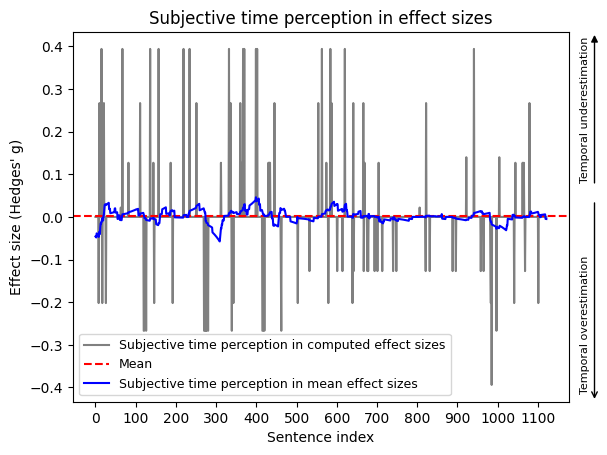

In [42]:
from matplotlib.patches import FancyArrowPatch

# Define placeholder data
x = range(0, len(smoothed_x[window_size-1:]))
y = smoothed_x[window_size-1:]

fig, ax = plt.subplots()

y2 = final_result[window_size-1:]
ax.plot(x, y2, label='Subjective time perception in computed effect sizes', color='gray')

# Plot the mean line and legend
ax.axhline(np.mean(y), color='red', linestyle='--', label='Mean')

# Plot the data
ax.plot(x, y, label='Subjective time perception in mean effect sizes', color='blue')

# Define custom arrows
arrow_up = FancyArrowPatch((0.94, 0.56), (0.94, 0.88), arrowstyle='-|>', color='black', mutation_scale=10)
arrow_down = FancyArrowPatch((0.94, 0.53), (0.94, 0.11), arrowstyle='->', color='black', mutation_scale=10)

# Add arrows to the axes
fig.add_artist(arrow_up)
fig.add_artist(arrow_down)


ax.legend(fontsize=9)
ax.set_title('Subjective time perception in effect sizes')
ax.set_xlabel('Sentence index')
ax.set_ylabel('Effect size (Hedges\' g)')
ax.set_xticks(np.arange(0, len(x), step=100))

# Add annotations for arrows
fig.text(0.925, 0.57, 'Temporal underestimation', color='black', fontsize=8, ha='center', rotation='vertical')
fig.text(0.925, 0.13, 'Temporal overestimation', color='black', fontsize=8, ha='center', rotation='vertical')

plt.show()